<Figure size 1200x600 with 0 Axes>

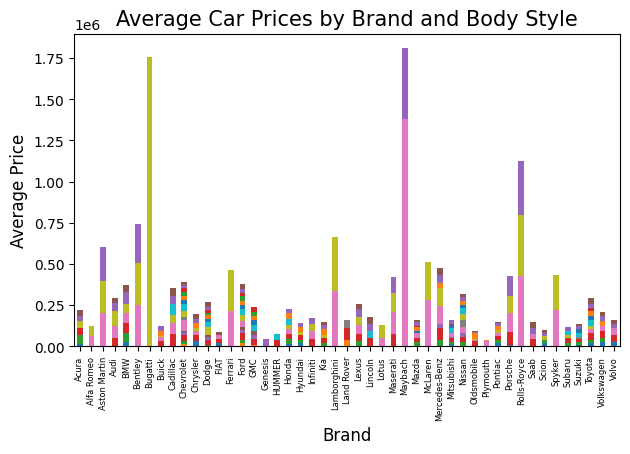

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the CSV file
df = pd.read_csv('car_data.csv')

# 2. Group the data by brand and body style, calculating mean prices
grouped_data = df.groupby(['Make', 'Vehicle Style'])['MSRP'].mean().unstack()

# 3. Create the stacked column chart
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)

# 4. Customize the chart
plt.title('Average Car Prices by Brand and Body Style', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)

# Remove legend
plt.legend().remove()

# Reduce x-axis label size and rotate
plt.xticks(rotation=90, ha='center', fontsize=6)
plt.tight_layout()

# 5. Show the chart
plt.show()

In [23]:
import pandas as pd
import plotly.graph_objs as go

# 1. Read the CSV file
try:
    df = pd.read_csv('car_data.csv')
except FileNotFoundError:
    print("The file 'car_data.csv' was not found.")
    exit()

# Check if necessary columns exist
required_columns = ['Make', 'Vehicle Style', 'MSRP']
if not all(col in df.columns for col in required_columns):
    print(f"Missing columns in the data: {set(required_columns) - set(df.columns)}")
    exit()

# Ensure 'MSRP' is numeric
df['MSRP'] = pd.to_numeric(df['MSRP'], errors='coerce')

# 2. Dropdown filter with multiple selection
def create_multi_select_chart(df):
    # Prepare data
    grouped_data = df.groupby(['Make', 'Vehicle Style'])['MSRP'].mean().reset_index()
    
    # Create figure with dropdown
    fig = go.Figure()

    # Add traces for each Vehicle Style
    vehicle_styles = grouped_data['Vehicle Style'].unique()
    for style in vehicle_styles:
        style_data = grouped_data[grouped_data['Vehicle Style'] == style]
        fig.add_trace(
            go.Bar(
                x=style_data['Make'], 
                y=style_data['MSRP'], 
                name=style,
                visible=(style == vehicle_styles[0])  # First style visible by default
            )
        )

    # Create visibility list for all styles
    visibility_all = [True] * len(vehicle_styles)

    # Update layout with dropdown
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                # Option to show all vehicle styles
                {
                    'method': 'update',
                    'label': 'All Vehicle Styles',
                    'args': [
                        {
                            'visible': visibility_all
                        },
                        {
                            'title': 'Average Car MSRP - All Vehicle Styles',
                            'barmode': 'stack'  # Set barmode to stack
                        }
                    ]
                }
            ] + [
                {
                    'method': 'update',
                    'label': style,
                    'args': [
                        {'visible': [style == trace.name for trace in fig.data]},
                        {'title': f'Average Car MSRP - {style} Vehicle Style', 'barmode': 'group'}  # Set barmode to group for individual styles
                    ]
                } 
                for style in vehicle_styles
            ],
            'direction': 'down',
            'showactive': True,
            'font': dict(size=10),  # Reduce font size of dropdown menu
        }],
        title='Car MSRP by Make and Vehicle Style',
        xaxis_title='Make',
        yaxis_title='Average MSRP',
        barmode='group',  # Default to group
        height=500,  # Height of the chart
        width=900,   # Width of the chart
        xaxis=dict(
            tickfont=dict(size=6),  # Reduce font size on x-axis
            tickangle=90,  # Rotate x-axis labels for better visibility
            automargin=True  # Automatically adjust margins
        ),
        margin=dict(l=50, r=50, t=50, b=100),  # Adjust margins to fit labels
        legend=dict(
            font=dict(size=8),  # Reduce font size of the legend
        )
    )

    return fig

# Generate the chart
multi_select_chart = create_multi_select_chart(df)

# Display the chart
multi_select_chart.show()